# NumPy

* Core Library for Scientific Computing (Data Science, ML, DL)

* High performance multidimensional array

* Mathematical Operations w/ arrays

## Use Cases:

* Array/Matrix Operations - Linear Algebra

* Dot Product

* Matrix Multiplication

* Linear Systems

* etc ...

## Installation and Basics

In [3]:
# NumPy Installation
# -------------------
# pip install numpy
# conda install numpy

In [8]:
# import numpy
import numpy as np

In [9]:
# check version
np.__version__

'1.23.5'

In [12]:
# build our array
a = np.array([1,2,3])

In [14]:
# print the array (one dimension)
a

array([1, 2, 3])

In [17]:
# analyse the array - returns touple, we can see one dimension with 3 elements
a.shape

(3,)

In [20]:
# determines the datatype
a.dtype

dtype('int64')

In [22]:
# no of dimensions
a.ndim

1

In [25]:
# returns total number of elements in the array
a.size

3

In [27]:
# size in bytes of each element
a.itemsize

8

In [29]:
# print the first element
a[0]

1

In [32]:
# assign value to elements
a[0] = 10
a[0]

10

In [34]:
# mathematical operations
b = a * np.array([2, 0, 2])
b

array([20,  0,  6])

## Array vs Python Lists
Arrays operate element wise -> applies the calculations to the elements

In [45]:
# python list
l = [1,2,3]

# numpy array
a = np.array([1,2,3])

#  Below we can see the same operations do very different things on lists and arrays -> BROADCASTING
l = l + [4]
print(l)

# Adds 4 to each index
a = a + np.array([4]) # technically should do ([4, 4, 4])
print(a)

# Again very different
l = l * 2
print(l)

# multiplied each of the elements by 2
a = a * 2
print(a)

[1, 2, 3, 4]
[5 6 7]
[1, 2, 3, 4, 1, 2, 3, 4]
[10 12 14]


In [47]:
# apply square root to each of the elements
np.sqrt(a)

array([3.16227766, 3.46410162, 3.74165739])

In [49]:
# log
np.log(a)

array([2.30258509, 2.48490665, 2.63905733])

## Dot Product

In [60]:
# Dot product in python with lists.
# This of course works but it is very cumbersome and complex unnecesarily
l1 = [1,2,3]
l2 = [4,5,6]

dot = 0
for i in range(len(l1)):
    dot += l1[i] * l2[i]
print(dot)

# NOW IN NUMPY -> much more efficient
a1 = np.array(l1)
a2 = np.array(l2)

dot = np.dot(a1,a2)
print(dot)


# Now lets do it step by step manually also:
sum1 = a1 * a2
dot = np.sum(sum1)
print(dot)

# another manual method
sum1 = a1 * a2
dot = (a1*a2).sum()
print(dot)

# THIS IS THE SIMPLEST WAY
dot = a1 @ a2
print(dot)

32
32
32
32
32


## Speed Test Array vs List

In [71]:
from timeit import default_timer as timer

a = np.random.randn(1000)
b = np.random.randn(1000)

# convert a np array back to a list
A = list(a)
B = list(b)

T = 1000

def dot1():
    dot = 0
    for i in range(len(A)):
        dot += A[i] * B[i]
    return dot

def dot2():
    return np.dot(a,b)

start = timer()
for t in range(T):
    dot1()
end = timer()
t1 = end-start

start = timer()
for t in range(T):
    dot2()
end = timer()
t2 = end-start

print('list calculation', t1)
print('np.dot', t2)
print('ratio', t1/t2)

# as we can see with np arrays, this operation is 113 times faster than the list calculations

list calculation 0.17261729100027878
np.dot 0.001642667000851361
ratio 105.08355674693333


## Multidimensional (ND) Arrays

In [83]:
# two dimensional array
a = np.array([[1,2,6], [3,4,8]])
print(a)
print(a.shape)

[[1 2 6]
 [3 4 8]]
(2, 3)


In [84]:
# prints the row
print(a[0])

[1 2 6]


In [85]:
# prints first row first column
print(a[0,0])

1


In [86]:
# slicing - print all rows and column 0
print(a[:,0])

[1 3]


In [87]:
# print whole first row
print(a[0,:])

[1 2 6]


In [88]:
# transpose our array
print(a.T)

[[1 3]
 [2 4]
 [6 8]]


In [93]:
# calculate the inverse of our array
a = np.array([[1,2], [3,4]])
print(np.linalg.inv(a))

[[-2.   1. ]
 [ 1.5 -0.5]]


In [95]:
# calculate the determinant
a = np.array([[1,2], [3,4]])
print(np.linalg.det(a))

-2.0000000000000004


In [98]:
## calculate the diagonal matrix
a = np.array([[1,2], [3,4]])

c = np.diag(a)
print(np.diag(c))

[[1 0]
 [0 4]]


## Indexing / Slicing / Boolean Indexing

In [105]:
a = np.array([[1,2], [3,4]])

# indexing md array
b = a[0,1]
print(b)

# now slicing
a = np.array([[1,2,3,4], [5,6,7,8]])

# row zero from 1 to 3
b = a[0,1:3]
print(b)

b = a[-1,-1]
print(b)

2
[2 3]
8


In [113]:
# Boolean Indexing
a = np.array([[1,2], [3,4], [5,6]])

# returns the value true or false where conditions is met in our array
bool_idx = a > 2
print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [115]:
# applying this to our original array returns only the elements where the bool_idx is true (> 2)
print(a[bool_idx])

[3 4 5 6]


In [117]:
# instead of doing in two steps we can say:
print(a[a > 2])

[3 4 5 6]


In [119]:
# array of same shape and where a !> 2 we put a -1
b = np.where(a>2, a, -1)
print(b)

[[-1 -1]
 [ 3  4]
 [ 5  6]]


In [122]:
# Fancy Indexing
a = np.array([10,19,30,41,50,61])
print(a)

# filters the array using a list
b = [1,3,5]
print(a[b])

[10 19 30 41 50 61]
[19 41 61]


In [132]:
# prints out all the even numbers in our array
even = np.argwhere(a%2==0).flatten()
print(a[even])

[2 4 6]


## Reshaping Arrays

In [129]:
# reshaping arrays
a = np.arange(1,7)

# one dimension with 6 elements
print(a)
print(a.shape)

[1 2 3 4 5 6]
(6,)


In [133]:
b = a.reshape((2,3)) # must fit the shape of 6 -> so could also be 3,2 and would be okay
print(b.shape)

(2, 3)


In [139]:
# adding a dimension to our one dimensional array
b = a[np.newaxis, :]
# a list of lists
print(b)

# 1 * 6
print(b.shape)

# or we can do it the other way around
b = a[:, np.newaxis]

# 6 * 1
print(b.shape)

[[1 2 3 4 5 6]]
(1, 6)
(6, 1)


## Concatenation

In [148]:
a = np.array([1,2])
print(a)

[1 2]


In [160]:
b = np.array([5,6])
c = np.concatenate((a,b), axis = 0)
print(c)

[1 2 5 6]


In [164]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])

# hstack
c = np.hstack((a,b))
print(c)

[1 2 3 4 5 6 7 8]


In [166]:
# vstack
c = np.vstack((a,b))
print(c)

[[1 2 3 4]
 [5 6 7 8]]


## Broadcasting

In [174]:
x = np.array([[1,2,3], [4,5,6], [1,2,3], [4,5,6]])
a = np.array([1,0,1])


# we want to add values 'a' to each column
y = x + a
print(y)

# this is called broadcasting and is very very powerful --> numpy figuress this out for us

[[2 2 4]
 [5 5 7]
 [2 2 4]
 [5 5 7]]


## Functions and Axis

In [178]:
a = np.array([[7,8,9,10,11,12,13], [17,18,19,20,21,22,23]])
print(a)

[[ 7  8  9 10 11 12 13]
 [17 18 19 20 21 22 23]]


In [180]:
# calculate sum of a
print(a.sum())

210


In [184]:
# could also use optional param axis

# axis 0 calculates along the rows
print(a)
print(a.sum(axis=0))

[[ 7  8  9 10 11 12 13]
 [17 18 19 20 21 22 23]]
[24 26 28 30 32 34 36]


In [186]:
# summing the rows -> be careful what axis you are using
print(a)
print(a.sum(axis=1))

[[ 7  8  9 10 11 12 13]
 [17 18 19 20 21 22 23]]
[ 70 140]


In [190]:
# calculates the overall mean
print(a)
print(a.mean(axis=None))

[[ 7  8  9 10 11 12 13]
 [17 18 19 20 21 22 23]]
15.0


In [192]:
# calculate variance
print(a.var(axis=None))

29.0


In [194]:
# calculate the standard deviation
print(a.std(axis=None))

# Can also use:
# .min
# .max
# etc etc etc

5.385164807134504


## Datatypes

In [196]:
x = np.array([1,2])
print(x)
print(x.dtype) # int with 64 bits (8 bytes)

[1 2]
int64


In [198]:
# if you use a float here, np automatically knows it
x = np.array([1.0,2.0])
print(x)
print(x.dtype)

[1. 2.]
float64


In [201]:
# you could also pass in your specific datatype
x = np.array([1.0,2.0], dtype=np.int64) # could also use int32, float16, etc etc etc etc
print(x)
print(x.dtype)

# having the wrong datatype in your array is a very common beginner mistake so to fix this error
# pass in the correct datatype the first time.

[1 2]
int64


## Copying Arrays

In [209]:
# this is a problem, both objects point to the same place in memory and even though we modified 'b', 'a' also changes
a = np.array([1,2,3])
b = a
b[0] = 42
print(b)
print(a)

[42  2  3]
[42  2  3]


#### SOLUTION: b = a.copy()

In [211]:
a = np.array([1,2,3])
b = a.copy()
b[0] = 42
print(b)
print(a)

[42  2  3]
[1 2 3]


## Generating Arrays

In [213]:
a = np.zeros((2,3))
print(a)

[[0. 0. 0.]
 [0. 0. 0.]]


In [218]:
a = np.ones((2,3))
print(a)
print(a.dtype)

[[1. 1. 1.]
 [1. 1. 1.]]
float64


In [222]:
a = np.full((2,3), 5.0)
print(a)

[[5. 5. 5.]
 [5. 5. 5.]]


In [225]:
# identity matrix
a = np.eye(3)
print(a)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [227]:
# arange method
a = np.arange(20)
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [230]:
# linspace function gets start, stop and number of steps
# equally spaced
a = np.linspace(0,10,5)
print(a)

[ 0.   2.5  5.   7.5 10. ]


## Random Numbers

In [232]:
# random numbers between 0 and 1
a = np.random.random((3,2)) # 0 -> 1
print(a)

[[0.70567951 0.41642714]
 [0.31054654 0.50658713]
 [0.66273204 0.16548622]]


In [236]:
a = np.random.randn(3,2) # normal or gaussian distribution
print(a)

[[-0.35756123 -0.09345868]
 [ 0.77045166 -0.50181523]
 [-0.81912793  0.05665884]]


In [240]:
a = np.random.randn(1000) # normal or gaussian distribution
print(a.mean(), a.var())

0.036676878266557626 0.9971102355380647


In [243]:
a = np.random.randint(3,10, size = (3,3)) # start and stop value
print(a)

[[8 6 9]
 [7 3 8]
 [4 3 9]]


In [258]:
a = np.random.choice(5, size = 10)
print(a)

a = np.random.choice((-6,-7,-8), size = 10)
print(a)

[2 0 0 1 3 1 4 1 1 2]
[-6 -6 -6 -6 -6 -8 -7 -7 -8 -8]


## Linear Algebra (Eigenvalues / Solving Linear Systems)

In [263]:
a = np.array([[1,2], [3,4]])
eigenvalues, eigenvectors = np.linalg.eig(a)

print(eigenvalues)
print(eigenvectors) # column vector

# e_vec * e_val = A * e_vec

[-0.37228132  5.37228132]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


In [265]:
b = eigenvectors[:,0] * eigenvalues[0]
print(b)

[ 0.30697009 -0.21062466]


In [269]:
c =  a @ eigenvectors[:,0] 
print(c)

[ 0.30697009 -0.21062466]


In [274]:
# comparing if the arrays are equal

print(b == c)
print(np.allclose(b,c))

[ True  True]
True


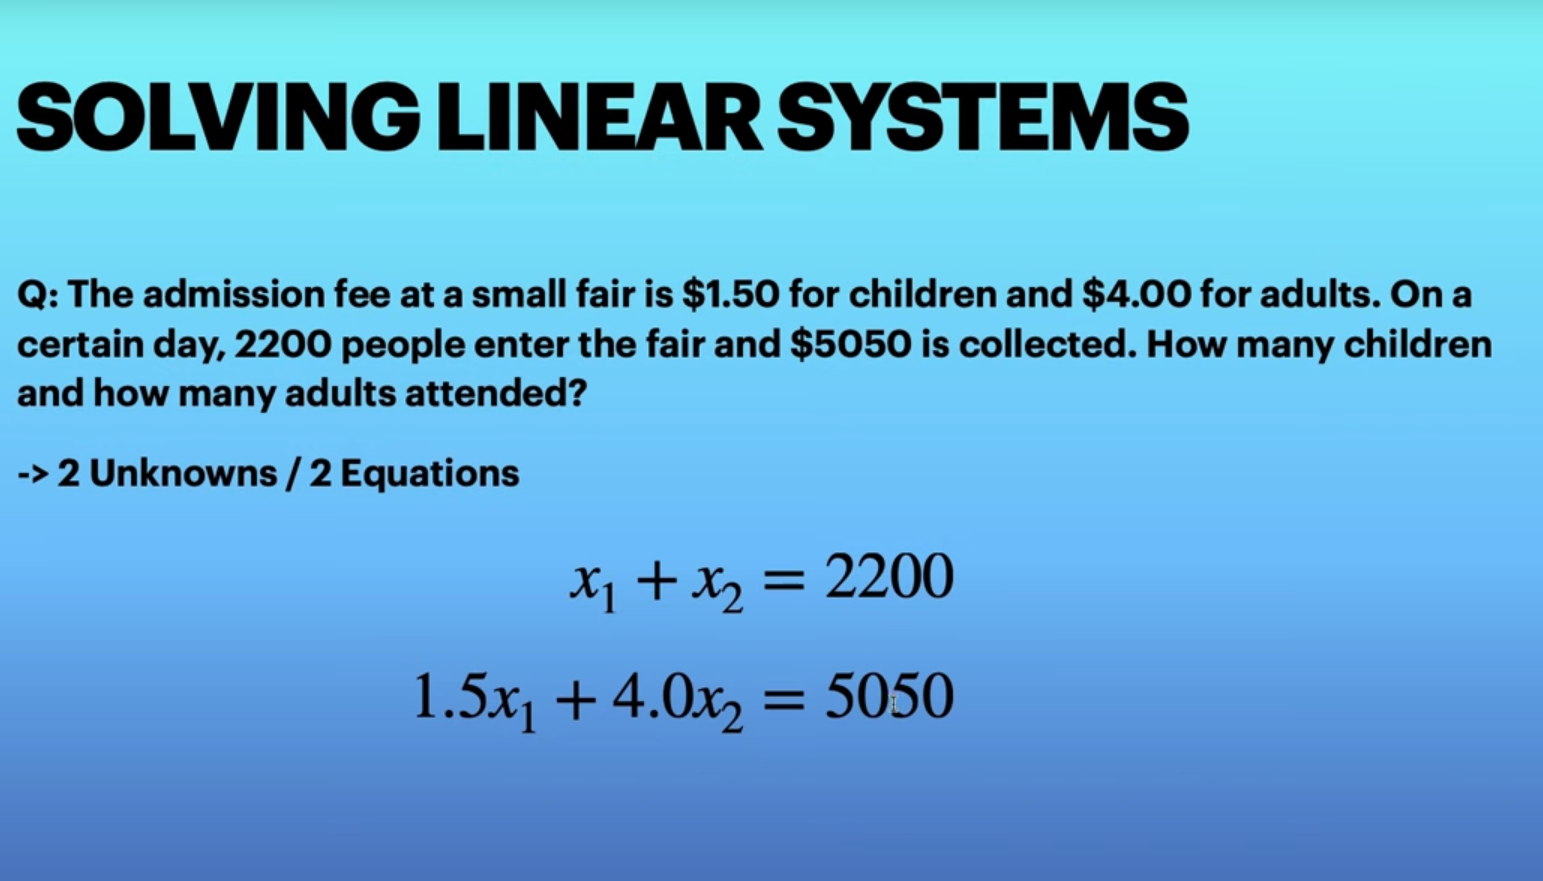

#### Mathematically Written ->

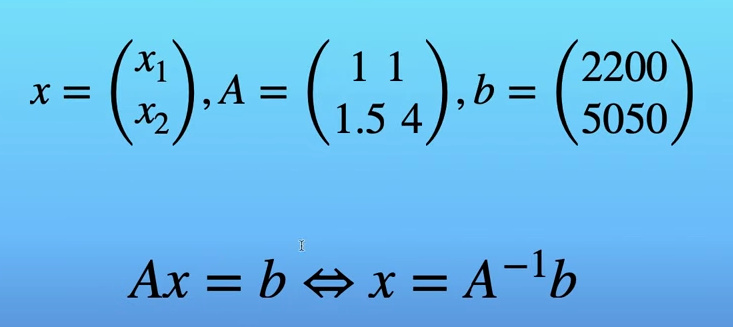

In [276]:
# First the manual way of solving the problem
A = np.array([[1,1], [1.5,4.0]])
b = np.array([2200, 5050])

X = np.linalg.inv(A).dot(b)
print(X)

# If you double check the math you see that this is correct but this code is slow and imperfect

[1500.  700.]


In [279]:
# The better way
x = np.linalg.solve(A, b)
print(x)

# very simple to solve linear equations with NumPy

[1500.  700.]


## Loading CSV Files

In [283]:
#np.loadtxt, np.genfromtxt

data = np.loadtxt('spambase.csv', delimiter=",", dtype=np.float32)
print(data.shape)

In [ ]:
data = np.genfromtxt('spambase.csv', delimiter=",", dtype=np.float32)
print(data.shape)